# Time Series Data Cleaning 
---
This notebook provides a comprehensive, stepwise cleaning workflow for time series dataset.

**Goals:**
- Prepare dynamic, static, and outcome data for deep learning models (Transformers, CNNs)
- Address missing values, outliers, feature transformations, encoding, and data integrity
- Save cleaned datasets for downstream modeling and analysis

# 1. Imports and Configuration
---

Import all necessary libraries for data cleaning, visualization, and reproducibility. Set display and plotting options for consistent results.

**Libraries Used:**
- pandas, numpy: Data manipulation
- matplotlib, seaborn: Visualization
- sklearn: Imputation, scaling, encoding
- warnings: Suppress warnings for cleaner output

In [106]:
# Import libraries for data cleaning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display and plotting options
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Data Loading
---

Load raw dynamic, static datasets from CSV/TXT files. Display initial shapes and preview data for each table.

**Files Used:**
- `patient_dynamic_tensors_df.csv` (dynamic features)
- `patient_static_data_df.csv` (static features)


In [107]:
# Load dynamic, static, and outcome datasets
dynamic_path = '../data/processed/patient_dynamic_tensors_df.csv'
static_path = '../data/processed/patient_static_data_df.csv'

dynamic_df = pd.read_csv(dynamic_path)
static_df = pd.read_csv(static_path)

print('Dynamic Data Shape:', dynamic_df.shape)
print('Static Data Shape:', static_df.shape)

# Preview top rows
display(dynamic_df.head())
display(static_df.head())


Dynamic Data Shape: (295354, 38)
Static Data Shape: (4000, 11)


,RecordID,Minutes,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,pH
0,137763,32,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,15.0,-1.0,-1.0,-1.0,49.0,-1.0,-1.0,-1.0,-1.0,-1.0,62.0,86.33,135.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.9,-1.0,-1.0,-1.0,-1.0,-1.0
1,137763,57,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,137763,62,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,47.0,-1.0,-1.0,-1.0,-1.0,-1.0,66.0,88.00,132.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,137763,92,229.0,5.0,22.0,2.9,15.0,0.8,-1.0,0.5,-1.0,-1.0,-1.0,141.0,32.0,28.6,-1.0,3.5,-1.0,-1.0,-1.0,1.5,-1.0,-1.00,-1.0,144.0,-1.0,-1.0,112.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.6,-1.0
4,137763,122,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,59.0,-1.0,-1.0,-1.0,-1.0,-1.0,66.0,88.00,132.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


,RecordID,Age,Gender,Height,ICUType,In-hospital_death,Length_of_stay,SAPS-I,SOFA,Survival,Weight
0,137763,52.0,1.0,185.4,1.0,0,8,9,2,1130,90.0
1,137035,65.0,1.0,-1.0,2.0,1,14,11,3,13,-1.0
2,135275,47.0,0.0,-1.0,1.0,0,3,4,1,10,86.6
3,138905,35.0,0.0,154.9,2.0,0,6,-1,7,-1,67.0
4,141424,64.0,0.0,-1.0,3.0,1,14,-1,-1,14,74.3


# 3. Initial Data Audit
---

Check data types, value ranges, and schema for each table. Identify columns with unexpected types or values. This step ensures the integrity and readiness of the data for cleaning.

**Tasks:**
- Display column data types
- Check for unexpected values (e.g., negative, extreme, or non-numeric)
- Summarize value ranges and unique values

In [108]:
# Display column data types for each table
print('Dynamic Data Types:')
print(dynamic_df.dtypes)
print('\nStatic Data Types:')
print(static_df.dtypes)

# Check value ranges and unique values
print('\nDynamic Feature Ranges:')
print(dynamic_df.describe(include='all'))

print('\nStatic Feature Ranges:')
print(static_df.describe(include='all'))


Dynamic Data Types:
RecordID         int64
Minutes          int64
ALP            float64
ALT            float64
AST            float64
Albumin        float64
BUN            float64
Bilirubin      float64
Cholesterol    float64
Creatinine     float64
DiasABP        float64
FiO2           float64
GCS            float64
Glucose        float64
HCO3           float64
HCT            float64
HR             float64
K              float64
Lactate        float64
MAP            float64
MechVent       float64
Mg             float64
NIDiasABP      float64
NIMAP          float64
NISysABP       float64
Na             float64
PaCO2          float64
PaO2           float64
Platelets      float64
RespRate       float64
SaO2           float64
SysABP         float64
Temp           float64
TroponinI      float64
TroponinT      float64
Urine          float64
WBC            float64
pH             float64
dtype: object

Static Data Types:
RecordID               int64
Age                  float64
Gender        

# 4. Missing Value Analysis and Imputation
---

Quantify missing values per column and theme. Visualize missingness. Apply imputation strategies for dynamic and static features. Create missingness masks for sequence models.

**Why use `np.nan` instead of -1 for missing values?**
- `np.nan` is the standard missing value indicator in pandas and numpy, recognized by all imputation and analysis functions.
- Using `np.nan` allows for proper imputation (e.g., forward fill, median) and enables creation of missingness masks for deep learning models.
- -1 could be a valid value for some features and may confuse the model or downstream analysis.
- For CNN/Transformer models, using `np.nan` ensures missingness is handled correctly and consistently, and allows for zero padding after imputation.

**Tasks:**
- Replace -1 with np.nan for missing values
- Visualize missingness (barplot, heatmap)
- Impute missing values (forward fill, median, domain-specific)
- Create missingness mask for sequence models

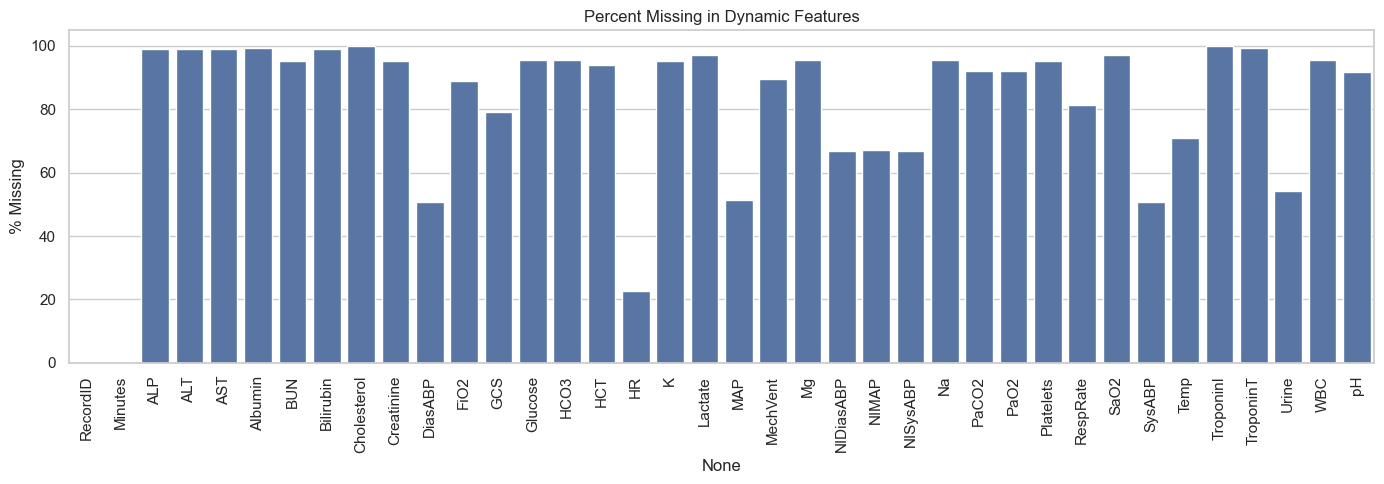

In [109]:
# Replace -1 with np.nan for missing values in dynamic and static data
dynamic_df.replace(-1, np.nan, inplace=True)
static_df.replace(-1, np.nan, inplace=True)

# Visualize missingness
missing_dynamic = dynamic_df.isnull().mean() * 100
plt.figure(figsize=(14, 5))
sns.barplot(x=missing_dynamic.index, y=missing_dynamic.values)
plt.xticks(rotation=90)
plt.title('Percent Missing in Dynamic Features')
plt.ylabel('% Missing')
plt.tight_layout()
plt.show()

# Impute missing values (forward fill for time series, median for static)
dynamic_df = dynamic_df.groupby('RecordID').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)
static_imputer = SimpleImputer(strategy='median')
static_df[static_df.columns] = static_imputer.fit_transform(static_df)

# Create missingness mask for sequence models (1 if observed, 0 if imputed)
missing_mask = (~dynamic_df.isnull()).astype(int)
dynamic_df.fillna(0, inplace=True)

# 5. Saving Cleaned Data
---

Save cleaned dataset

In [110]:
# Final save: Merge all cleaned tables and save as one file for modeling, and save missingness mask separately
merged_df = dynamic_df.merge(static_df, on='RecordID', how='left')
merged_df.to_csv('../data/processed/timeseries_cleaned_all_features.csv', index=False)
missing_mask.to_csv('../data/processed/timeseries_missingness_mask.csv', index=False)
print('All cleaned data and missingness mask saved.')

All cleaned data and missingness mask saved.


In [111]:
# Read the data and show top 5 records
dynamic_df = pd.read_csv('../data/processed/timeseries_cleaned_all_features.csv')

dynamic_df.head(10)

,RecordID,Minutes,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,pH,Age,Gender,Height,ICUType,In-hospital_death,Length_of_stay,SAPS-I,SOFA,Survival,Weight
0,132539,7,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,73.0,4.4,0.0,0.0,0.0,1.5,65.0,92.33,147.0,137.0,0.0,0.0,221.0,19.0,0.0,0.0,35.1,0.0,0.0,900.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
1,132539,37,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,77.0,4.4,0.0,0.0,0.0,1.5,58.0,91.00,157.0,137.0,0.0,0.0,221.0,19.0,0.0,0.0,35.6,0.0,0.0,60.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
2,132539,97,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,60.0,4.4,0.0,0.0,0.0,1.5,62.0,87.00,137.0,137.0,0.0,0.0,221.0,18.0,0.0,0.0,35.6,0.0,0.0,30.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
3,132539,157,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,62.0,4.4,0.0,0.0,0.0,1.5,52.0,75.67,123.0,137.0,0.0,0.0,221.0,19.0,0.0,0.0,35.6,0.0,0.0,170.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
4,132539,188,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,62.0,4.4,0.0,0.0,0.0,1.5,52.0,75.67,123.0,137.0,0.0,0.0,221.0,19.0,0.0,0.0,35.6,0.0,0.0,170.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
5,132539,217,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,80.0,4.4,0.0,0.0,0.0,1.5,52.0,72.67,114.0,137.0,0.0,0.0,221.0,20.0,0.0,0.0,37.8,0.0,0.0,60.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
6,132539,277,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,74.0,4.4,0.0,0.0,0.0,1.5,52.0,72.67,114.0,137.0,0.0,0.0,221.0,20.0,0.0,0.0,37.8,0.0,0.0,60.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
7,132539,337,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,73.0,4.4,0.0,0.0,0.0,1.5,45.0,66.67,110.0,137.0,0.0,0.0,221.0,17.0,0.0,0.0,37.8,0.0,0.0,170.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
8,132539,457,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,64.0,4.4,0.0,0.0,0.0,1.5,49.0,68.33,107.0,137.0,0.0,0.0,221.0,15.0,0.0,0.0,38.1,0.0,0.0,120.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
9,132539,517,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.8,0.0,0.0,15.0,205.0,26.0,33.7,64.0,4.4,0.0,0.0,0.0,1.5,56.0,71.33,102.0,137.0,0.0,0.0,221.0,14.0,0.0,0.0,38.1,0.0,0.0,80.0,11.2,0.0,54.0,0.0,170.2,4.0,0.0,5.0,6.0,1.0,70.0,78.6
